features:  tensor([-0.4195,  0.2059]) 
label:  tensor([2.6561])
epoch1, loss 0.044823
epoch2, loss 0.000184
epoch3, loss 0.000053
w的估计误差: tensor([ 0.0003, -0.0010], grad_fn=<SubBackward0>)
b的估计误差: tensor([-5.5790e-05], grad_fn=<RsubBackward1>)


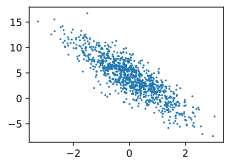

In [31]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l
def synthetic_data(w,b,num_examples):
    X=torch.normal(0,1,(num_examples, len(w)))
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))
true_w = torch.tensor([2, -3.4])
true_b= 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features: ', features[0],'\nlabel: ',labels[0])
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),1);
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples, batch_size):
        batch_indices=torch.tensor(
            indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            par am.grad.zero_()

def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b


w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w , b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_1 = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_1.mean()):f}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')